# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

In [2]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.

In [3]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.720
Date:                Mon, 05 Jun 2023   Prob (F-statistic):             0.0991
Time:                        03:12:33   Log-Likelihood:                -17149.
No. Observations:                5102   AIC:                         3.430e+04
Df Residuals:                    5100   BIC:                         3.432e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0564      0.290    100.143      0.000      28.488      29.625
RIDAGEYR       0.0091      0.006      1.649      0.099      -0.002       0.020
==============================================================================
Omnibus:                      936.202   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1857.656
Skew:                           1.105   Prob(JB):                         0.00
Kurtosis:                       4.964   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

__A1a.__ coef for RIDAGEYR turns out to be "0.0091", which is almost close to zero, but at least a positive real number; which says that the older people have higher BMI than younger people, in average.

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

__A1b.__ In the "RIDAGEYR" row, p-value is 0.099 > 0.05: so with the 95% confidence interval in mind, not quite confident about the relationship.

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

__A1c.__ (average BMI) = 0.0091 * (40 - 20) = 0.182: so , in average, 40 year old has about 0.182 more BMI than 20 year old.

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

__A1d.__ As R-squared:	0.001, this suggests that about 0.001 - fraction of the variation of BMI in this population is explained by age.

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [4]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


In [5]:
'''
Accorting to "RIDRETH1" in
https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)
'''

da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White",
                                       4: "Non-Hispanic-Black", 5: "Other Race - Including Multi-Racial"})

In [6]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,RIDRETH1x
0,128.0,62,1,3,5.0,27.8,1,Non-Hispanic White
1,146.0,53,1,3,3.0,30.8,1,Non-Hispanic White
2,138.0,78,1,3,3.0,28.8,1,Non-Hispanic White
3,132.0,56,2,3,5.0,42.4,2,Non-Hispanic White
4,100.0,42,2,4,4.0,20.3,2,Non-Hispanic-Black


In [7]:
model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     53.06
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           7.39e-54
Time:                        03:12:34   Log-Likelihood:                -17021.
No. Observations:                5102   AIC:                         3.405e+04
Df Residuals:                    5096   BIC:                         3.409e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           30.7901      0.346     88.862      0.000      30.111      31.469
RIDRETH1x[T.Non-Hispanic White]                     -1.8978      0.282     -6.723      0.000      -2.451      -1.344
RIDRETH1x[T.Non-Hispanic-Black]                     -0.4545      0.309     -1.471      0.141      -1.060       0.151
RIDRETH1x[T.Other Hispanic]                         -0.9155      0.346     -2.649      0.008      -1.593      -0.238
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.8263      0.335    -14.423      0.000      -5.482      -4.170
RIDAGEYR                                             0.0059      0.005      1.088      0.277      -0.005       0.017
==============================================================================
Omnibus:                      956.057   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1967.508
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.082   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

__A2a__. there is a slight decrease (in mean): from 0.0091 to 0.0059

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

__A2b__. a slight decrease: from 0.006 to 0.005

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

__A2c__. R-squared = 0.049 for latter case and R-squared = 0.001 for the former (age alone) case. This implies that about 0.048 more of additional variation in BMI is explained by age,gender, and ethnicity that is not explained by age alone.

__Q2d.__ What reference level did the software select for the ethnicity variable?

__A2d__. As there is no "Mexican American" in the resulting table above, reference level = "Mexican American"

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

__A2e__. As the only difference between the two groups are age (we're comparing in the same ethnic group), the expected diffrence (of BMI) is about 10 * 0.0059 = 0.059

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

__A2f__. Here age is same but ethnic group is different, and according to our summary above, the expected difference of BMI is about 0 - 0.4545 = -0.4545; which says that, in average, non-Hispanic black man has about 0.4545 less BMI than Mexican-American (of same age "50") in the given population.

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.

In [8]:
sample_size = int(da.shape[0] * 0.25)
print(sample_size)

1275


In [9]:
result.summary()
# for comparison - see Q3a.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     53.06
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           7.39e-54
Time:                        03:12:34   Log-Likelihood:                -17021.
No. Observations:                5102   AIC:                         3.405e+04
Df Residuals:                    5096   BIC:                         3.409e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           30.7901      0.346     88.862      0.000      30.111      31.469
RIDRETH1x[T.Non-Hispanic White]                     -1.8978      0.282     -6.723      0.000      -2.451      -1.344
RIDRETH1x[T.Non-Hispanic-Black]                     -0.4545      0.309     -1.471      0.141      -1.060       0.151
RIDRETH1x[T.Other Hispanic]                         -0.9155      0.346     -2.649      0.008      -1.593      -0.238
RIDRETH1x[T.Other Race - Including Multi-Racial]    -4.8263      0.335    -14.423      0.000      -5.482      -4.170
RIDAGEYR                                             0.0059      0.005      1.088      0.277      -0.005       0.017
==============================================================================
Omnibus:                      956.057   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1967.508
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.082   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# put random_state=42 for reimplementation purpose (via fixing the random seed)
da1 = da.sample(n=sample_size, random_state=42)

model1 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x", data=da1)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     10.02
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.03e-09
Time:                        03:12:34   Log-Likelihood:                -4235.4
No. Observations:                1275   AIC:                             8483.
Df Residuals:                    1269   BIC:                             8514.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           30.3213      0.691     43.872      0.000      28.965      31.677
RIDRETH1x[T.Non-Hispanic White]                     -1.5846      0.558     -2.837      0.005      -2.680      -0.489
RIDRETH1x[T.Non-Hispanic-Black]                      0.0568      0.599      0.095      0.924      -1.119       1.233
RIDRETH1x[T.Other Hispanic]                         -0.5720      0.667     -0.858      0.391      -1.880       0.736
RIDRETH1x[T.Other Race - Including Multi-Racial]    -3.9407      0.673     -5.857      0.000      -5.261      -2.621
RIDAGEYR                                             0.0051      0.011      0.475      0.635      -0.016       0.026
==============================================================================
Omnibus:                      222.029   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              428.689
Skew:                           1.036   Prob(JB):                     8.15e-94
Kurtosis:                       4.943   Cond. No.                         307.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

__A3a.__ regression coefficients:

standard errors:

R-squred is slightly lower(0.049 to 0.038)

In [11]:
# # instead of using the above series of codes, we may apply this one below:

# # put random_state=42 for reimplementation purpose (via fixing the random seed)
# np.random.seed(42)

# # random indices
# rand_ind = np.random.choice(da.shape[0], size=sample_size, replace=False)
# da1 = da.iloc[rand_ind]

# model1 = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x", data=da1)
# result1 = model1.fit()
# result1.summary()

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

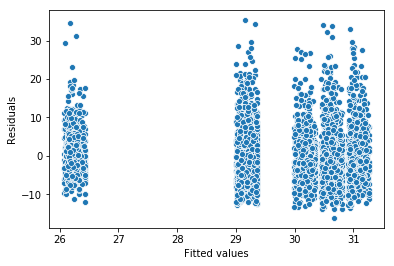

In [12]:
# In Question 2, we got OLS result for model = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x", data=da)

pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

__Q4a.__ What mean/variance relationship do you see?

__A4a.__ There seems a lot of variance along each fitted values for each groups; 26~26.5. 29~29.30~30.5, 30.5~30.8, 30.8~31.3. Here those five groups represent 5 ethnic & gender clusters: "RIDRETH1x". Meanwhile in each group, that huge variance accounts for the variation of BMIs along age difference.

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

In [13]:
# recall from above cells that we've used the following names for each column
'''
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]

da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexiacan American", 2: "Other Hispanic", 3: "Non-Hispanic White",
                                       4: "Non-Hispanic-Black", 5: "Other Race - Including Multi-Racial"})
'''

'\nvars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]\n\nda["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexiacan American", 2: "Other Hispanic", 3: "Non-Hispanic White",\n                                       4: "Non-Hispanic-Black", 5: "Other Race - Including Multi-Racial"})\n'

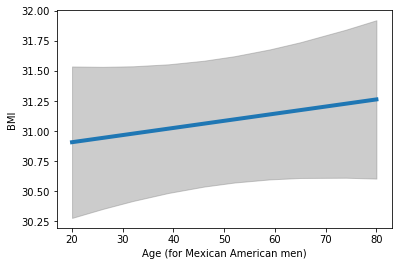

In [14]:
from statsmodels.sandbox.predict_functional import predict_functional


# here I set "BPXSY1" as -1, for: this is aa numerical value
values = {"BPXSY1": -1, "RIAGENDR": 1, "RIDRETH1": 1, "RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "SMQ020": 1}

pr, cb, fv = predict_functional(result, "RIDAGEYR",
                               values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age (for Mexican American men)")
_ = ax.set_ylabel("BMI")

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

__A5a.__ About 4-5 years of age according to the confidence interval(grey area)

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

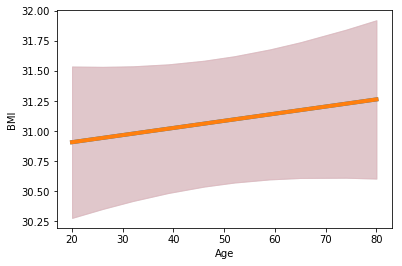

In [15]:
# only need to change the gender variable to women, which is "RIAGENDR": 2
values2 = {"BPXSY1": -1, "RIAGENDR": 2, "RIDRETH1": 1, "RIDRETH1x": "Mexican American",
          "DMDEDUC2": 1, "SMQ020": 1}

pr2, cb2, fv2 = predict_functional(result, "RIDAGEYR",
                               values=values2, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)

ax = sns.lineplot(fv2, pr2, lw=4)
ax.fill_between(fv2, cb2[:, 0], cb2[:, 1],color='pink', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("BMI")

__A5b.__ They overlap in all age.

## Question 6:

Use an `added variable plot` to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

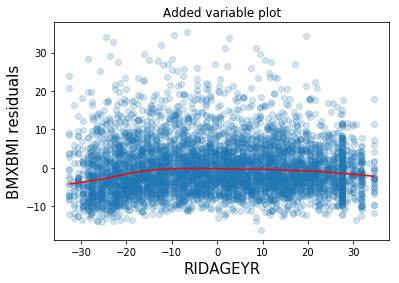

In [16]:
from statsmodels.graphics.regressionplots import add_lowess

model = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIDRETH1x", data=da)
result2 = model.fit()
result2.summary()

fig = result2.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

__Q6a.__ What is your interpretation of the added variable plot?

__A6a.__ BMI increases for the first 15 years or so of age, and slightly decreases as age increases.

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

In [22]:
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

__A7a. 

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

__A7b. 

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [18]:
# enter your code here

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [19]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [20]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?